In [44]:
#Import packages
import pandas as pd
pd.set_option('mode.chained_assignment', None)  # Suppress SettingWithCopyWarning

import numpy as np
import os

from functions import plotting_raw_data, remove_outliers, error_plot, plot_cpt_data, plot_cpt_data_ML_prediction, plot_cpt_data_NW_site

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
file_path = r"C:\Users\haris\Documents\GitHub\ISC7_DataDrivenSiteCharacterization\data\BBC\Sand\CPT\OYSC35.xlsx"
#file_path = r"C:\Users\haris\Documents\GitHub\ISC7_DataDrivenSiteCharacterization\data\BBC\Sand\CPT\OYSC18.xlsx"
#file_path = r"C:\Users\haris\Documents\GitHub\ISC7_DataDrivenSiteCharacterization\data\BBC\Clay\ONSC23.xlsx"

#select desired columns as for the model training
selected_columns_x = ['Depth (m)','qc (MPa)', 'fs (kPa)','Rf (%)','Vs (m/s)'] #for Machine learning features
plot_columns_x_label = ['Depth (m)','$q_c$ (MPa)', '$f_s$ (kPa)','$R_f$ (%)', '$v_s$ (m/s)'] #for plotting purpose

# Read the Excel file into a DataFrame
df_test_norwegen = pd.read_excel(file_path)
df_test_norwegen.drop(index=df_test_norwegen.index[:2], axis=0, inplace=True)
df_test_norwegen = df_test_norwegen.astype(float)

# data preprocessing
data_preproccesed = df_test_norwegen[['Depth', 'Tip resistance', 'Sleeve friction']]
data_preproccesed['Rf (%)'] = df_test_norwegen['Sleeve friction'].values / (df_test_norwegen['Tip resistance'].values * 1000) * 100
data_preproccesed['Shear wave'] = df_test_norwegen['Shear wave']
data_preproccesed = data_preproccesed.astype(float)


column_mapping = {
    'Depth': 'Depth (m)',
    'Tip resistance': 'qc (MPa)',
    'Sleeve friction': 'fs (kPa)',
    'Rf (%)': 'Rf (%)',
    'Shear wave': 'Vs (m/s)'
}

# Rename columns in x_data_nor
data_preproccesed = data_preproccesed.rename(columns=column_mapping)
df_test_norwegen_raw = data_preproccesed.copy()

for column in data_preproccesed.columns[:-1]:
    data_preproccesed[column] = data_preproccesed[column].rolling(window=50).mean()

data_preproccesed_dropped = data_preproccesed.dropna(subset=['Vs (m/s)'])

x_data_nor = data_preproccesed_dropped[selected_columns_x[:-1]]
y_data_nor = data_preproccesed_dropped['Vs (m/s)']

In [51]:
import joblib

# Load the model
loaded_model = joblib.load('xgb_model.joblib')

In [60]:
# Check performance on Norwegian data
y_pred = loaded_model.predict(x_data_nor)
# Calculate the R-squared score, Mean squared error
score = r2_score(np.array(y_data_nor), np.array(y_pred))
mse = mean_squared_error(y_data_nor, y_pred)
print(f'Norwegian test data - R2: {round(score, 3)}, MSE: {round(mse, 3)}.')

TypeError: 'numpy.float64' object is not callable

In [53]:
print(np.array(y_data_nor))

[156.2456596  208.32754614 153.05697267 288.45352542 182.92174783
 166.66203691 176.46568614 185.18004101 194.7997834  187.49479152
 180.71787135 187.49479152 199.99444429 205.47374413 197.36293844
 199.99444429 199.99444429 217.38526553 227.26641397]


In [56]:
print(np.array(y_pred))

[188.62665 209.01799 256.9137  284.9457  260.446   283.1509  248.60542
 251.54906 276.7451  235.96042 271.1261  261.40082]


In [55]:
import numpy as np

# Observed values
y_true = np.array([163.61590653, 171.40714018, 189.44999704, 199.97499687, 218.15454205,
                   399.94999375, 205.68856821, 199.97499687, 211.73823198, 224.97187148,
                   224.97187148, 232.22902863])

# Predicted values
y_pred = np.array([188.62665, 209.01799, 256.9137, 284.9457, 260.446, 283.1509, 248.60542,
                   251.54906, 276.7451, 235.96042, 271.1261, 261.40082])

# Mean of observed values
y_mean = np.mean(y_true)

# Total sum of squares (TSS)
TSS = np.sum((y_true - y_mean) ** 2)

# Residual sum of squares (RSS)
RSS = np.sum((y_true - y_pred) ** 2)

# R² score
r2_score = 1 - (RSS / TSS)

print("R² score:", r2_score)

R² score: -0.02339334201739529


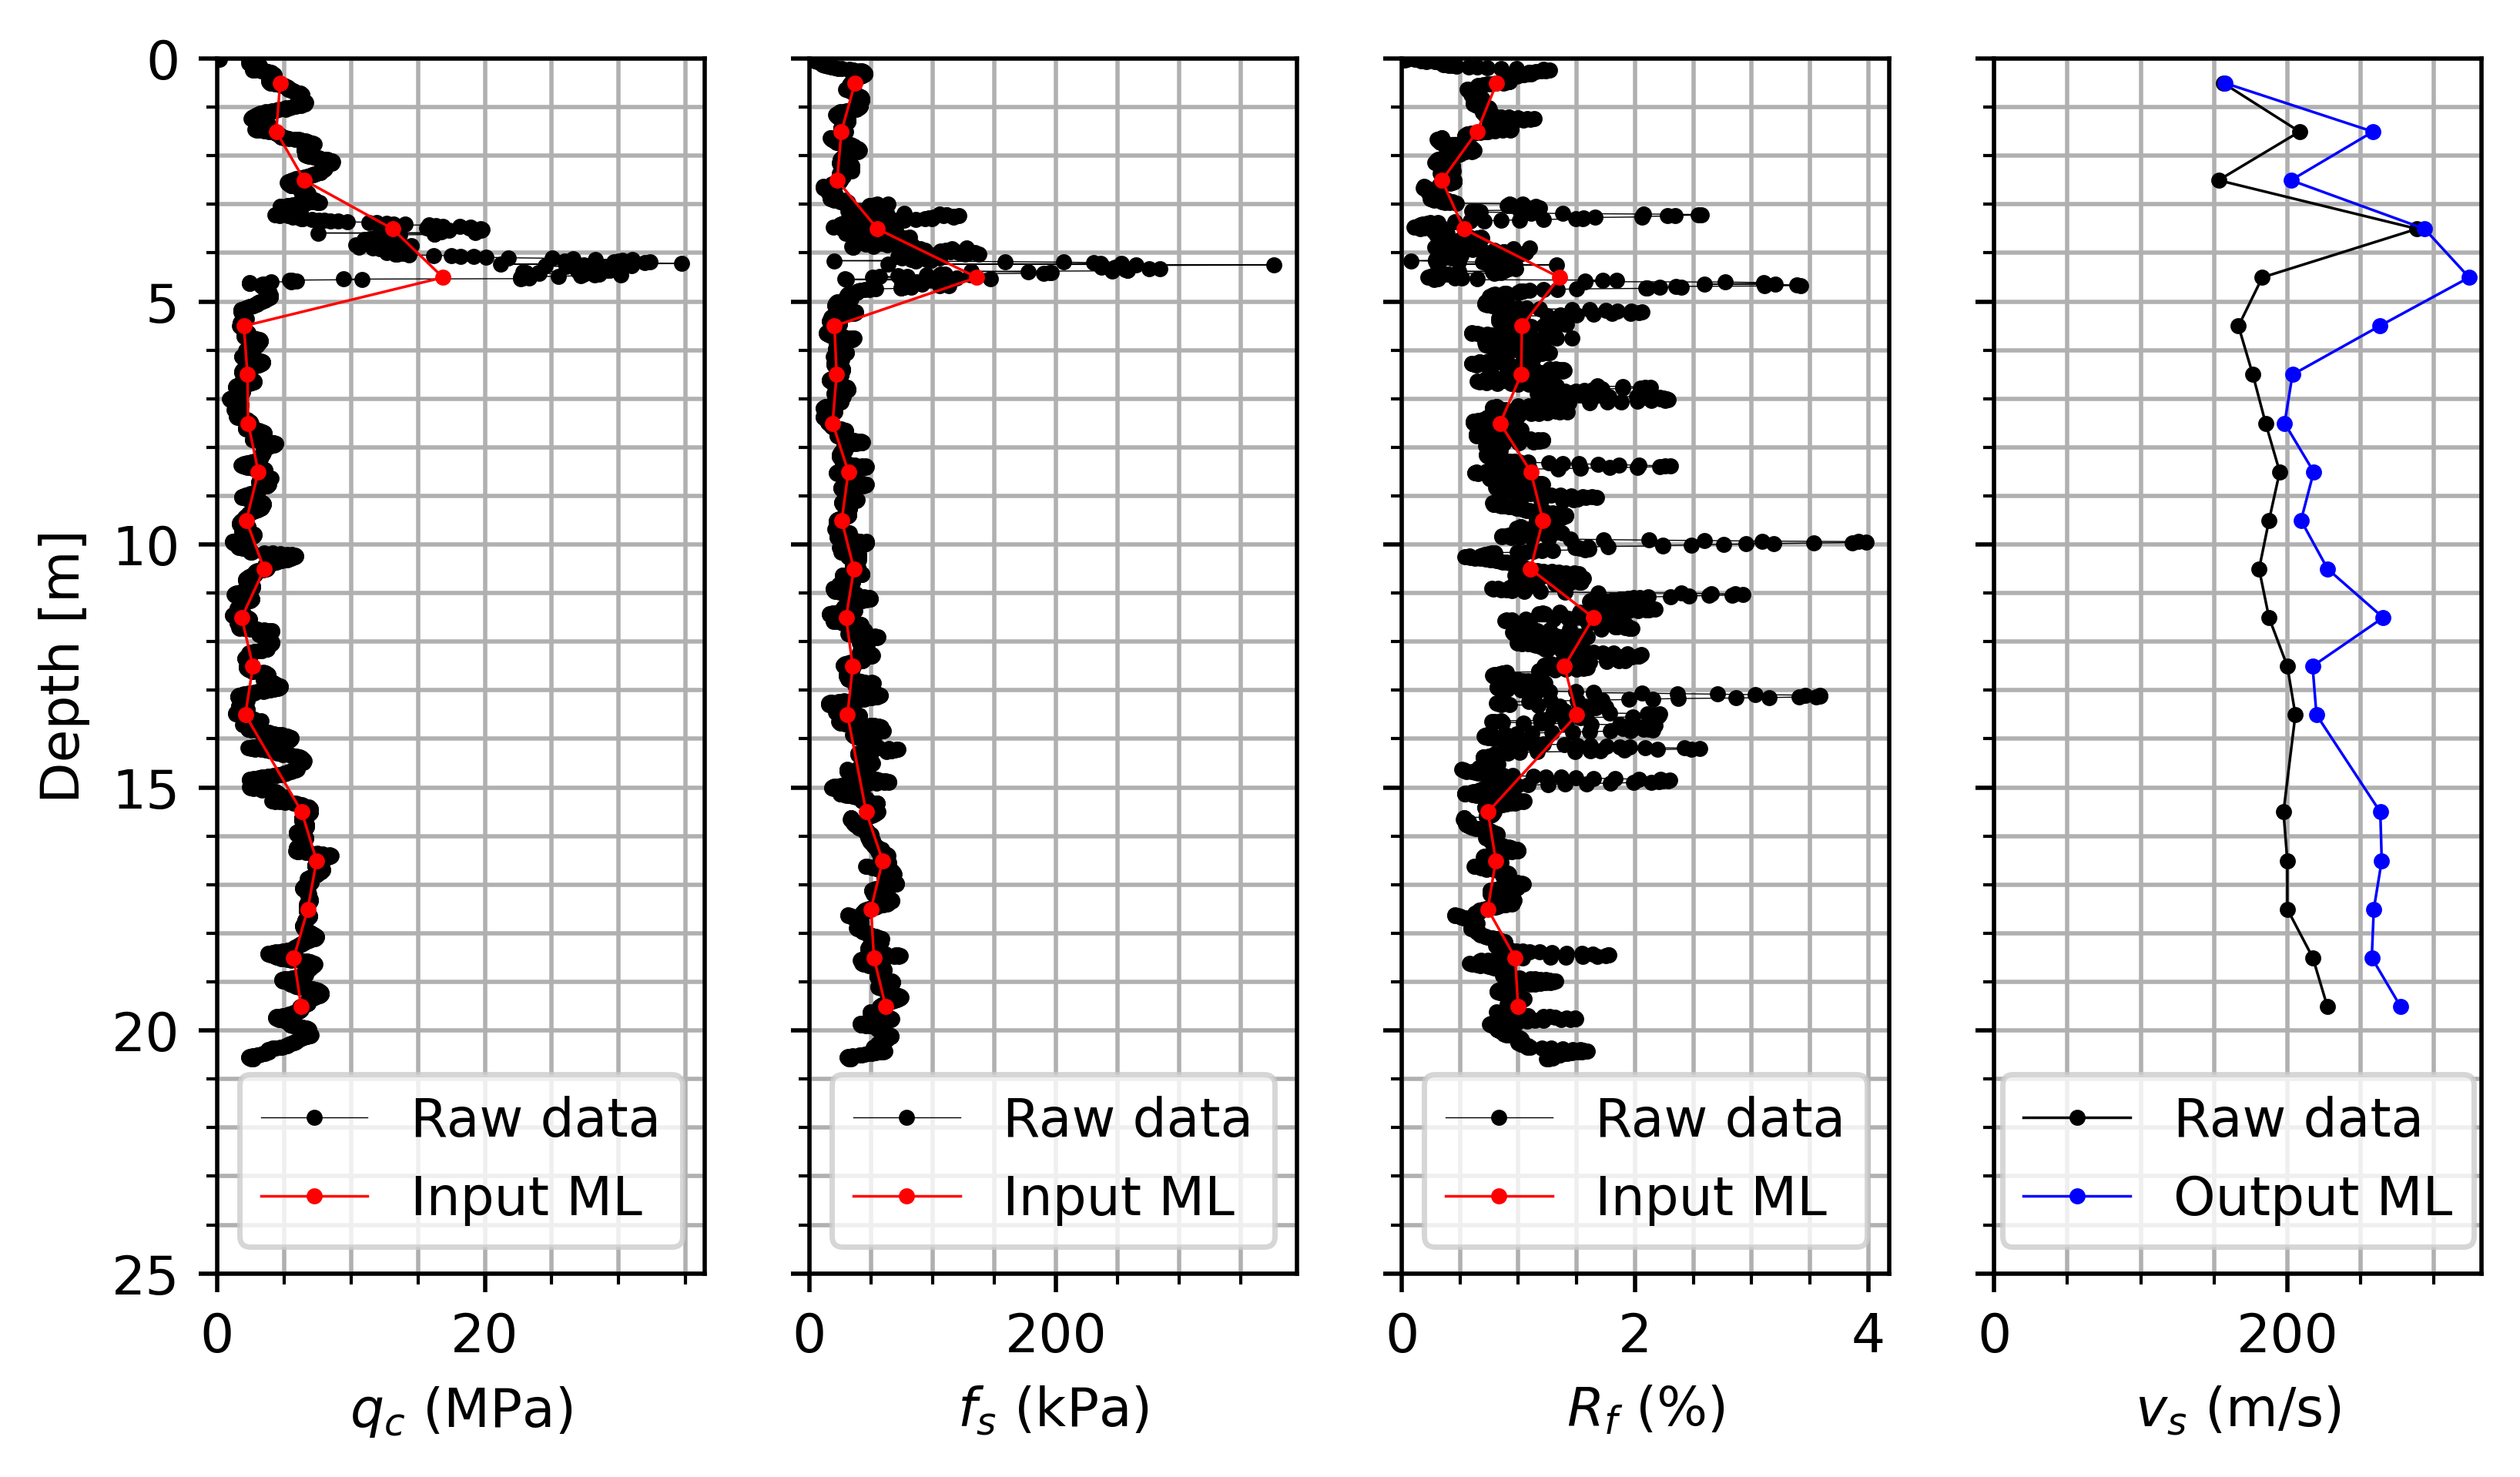

In [54]:
cm = 1/2.54  # centimeters in inches
plot_cpt_data_NW_site((17*cm, 10*cm), selected_columns_x, df_test_norwegen_raw, data_preproccesed, data_preproccesed_dropped, y_data_nor, y_pred, plot_columns_x_label)
plt.savefig(r"..\\graphics\Norwegian_test_site_XGBRegressor.png", dpi = 700)